<a href="https://colab.research.google.com/github/RobNewt/Data-Analysis/blob/master/Billboard_Top_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Billboard Top 100

This dataset, available via Data.world, contains every weekly Hot 100 singles chart between 8/2/1958 and 12/28/2019 from Billboard.com. Each row of data represents a song and the corresponding position on that week's chart. Included in each row are the following elements:
1. Billboard Chart URL
2. WeekID
3. Song name
4. Performer name
5. SongID - Concatenation of song & performer
6. Current week on chart
7. Instance (this is used to separate breaks on the chart for a given song. Example, an instance of 6 tells you that this is the sixth time this song has appeared on the chart)
8. Previous week position
9. Peak Position (as of the corresponding week)
10. Weeks on Chart (as of the corresponding week)

Also available is a dataset containing each song's "audio features."

These include common attributes like genre as well as the following:
1. Danceability
2. Energy
3. Key
4. Loudness
5. Mode
6. Speechiness
7. Acousticness
8. Instrumentalness
9. Liveness
10. Valence
11. Tempo
12. Time Signature

Definitions of those terms are available at https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Here's an example:

Liveliness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.



I'm excited about this data set. In addition to already numeric things like tempo, the ability to measure things like instrumentalness and speechiness give us some fun quantative measurements to play around with. I find change over time interesting, so I think I'm curious to see how things like average length of time on chart, average length of time on chart for #1 songs, and similar metrics change over time.

After exploring all that, I have a little bit of machine learning I'd like to do with this data set. First, I'd like to use the features available in the second dataframe to see what clusters exist within these weekly top 100 songs. Then I'm curious to see if I can use features from both dataframes to predict when a song originated.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime
register_matplotlib_converters()
import seaborn as sns


# 1: Explore the Charts
Let's just explore the data sets, do some cleaning/preprocessing, and get a sense of what's in there.

In [85]:
df1= pd.read_csv("https://query.data.world/s/ywri3z52sryyglb3esstvexlw7hvl3")


In [86]:
print(len(df1))
df1.head()

320495


url  ... Weeks on Chart
0  http://www.billboard.com/charts/hot-100/1958-0...  ...              1
1  http://www.billboard.com/charts/hot-100/1995-1...  ...              1
2  http://www.billboard.com/charts/hot-100/1997-1...  ...              1
3  http://www.billboard.com/charts/hot-100/2006-0...  ...              1
4  http://www.billboard.com/charts/hot-100/2009-1...  ...              1

[5 rows x 10 columns]

In [87]:
df1['WeekID']=pd.to_datetime(df1['WeekID'], infer_datetime_format=True) #Let's convert WeekID to a date. Then it'll be easier to compare and sort with.

In [88]:
df1.isnull().sum()

url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    30784
Peak Position                 0
Weeks on Chart                0
dtype: int64

This is a really clean set. Those missing Previous Week Position values are all from songs appearing on the chart for the first time and shouldn't have a value there. I'm going to tidy this data by defining an observation to be the number of weeks a song was on the chart, it's peak position, and it's final Week ID

In [89]:
df1['Song']

0                                          Poor Little Fool
1                                             One Sweet Day
2         Candle In The Wind 1997/Something About The Wa...
3                                       Do I Make You Proud
4                                                         3
                                ...                        
320490                                     Jingle Bell Rock
320491                                     Jingle Bell Rock
320492                                     Jingle Bell Rock
320493                                     Jingle Bell Rock
320494                                     Jingle Bell Rock
Name: Song, Length: 320495, dtype: object

In [90]:
df1[df1['Song'] == 'Jingle Bell Rock'][:8]

url  ... Weeks on Chart
14317   http://www.billboard.com/charts/hot-100/1958-1...  ...              1
28510   http://www.billboard.com/charts/hot-100/1961-1...  ...              1
85018   http://www.billboard.com/charts/hot-100/1958-1...  ...              2
85502   http://www.billboard.com/charts/hot-100/1961-1...  ...              2
116000  http://www.billboard.com/charts/hot-100/1962-0...  ...              5
126618  http://www.billboard.com/charts/hot-100/1961-1...  ...              3
127909  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
177460  http://www.billboard.com/charts/hot-100/1961-1...  ...              4

[8 rows x 10 columns]

Hmm, a few occurences of Jingle Bell Rock. Let's see how many and when they appear.

In [91]:
df1[(df1['Song']=='Jingle Bell Rock')].sort_values(by='Weeks on Chart', ascending = False)

url  ... Weeks on Chart
320494  https://www.billboard.com/charts/hot-100/2019-...  ...             29
320493  https://www.billboard.com/charts/hot-100/2019-...  ...             28
320492  https://www.billboard.com/charts/hot-100/2019-...  ...             27
320491  https://www.billboard.com/charts/hot-100/2019-...  ...             26
320490  https://www.billboard.com/charts/hot-100/2019-...  ...             25
320489  https://www.billboard.com/charts/hot-100/2018-...  ...             24
320488  https://www.billboard.com/charts/hot-100/2018-...  ...             23
320487  https://www.billboard.com/charts/hot-100/2018-...  ...             22
320486  https://www.billboard.com/charts/hot-100/2018-...  ...             21
320470  http://www.billboard.com/charts/hot-100/2017-0...  ...             20
320468  http://www.billboard.com/charts/hot-100/2016-1...  ...             19
320466  http://www.billboard.com/charts/hot-100/2016-1...  ...             18
320438  http://www.billboard.com/charts/hot-100/2016-0...  ...             17
320382  http://www.billboard.com/charts/hot-100/1962-1...  ...             16
320376  http://www.billboard.com/charts/hot-100/1962-1...  ...             15
320373  http://www.billboard.com/charts/hot-100/1962-1...  ...             14
320369  http://www.billboard.com/charts/hot-100/1962-1...  ...             13
319936  http://www.billboard.com/charts/hot-100/1962-0...  ...             12
319903  http://www.billboard.com/charts/hot-100/1961-1...  ...             11
319864  http://www.billboard.com/charts/hot-100/1961-1...  ...             10
319826  http://www.billboard.com/charts/hot-100/1961-1...  ...              9
319786  http://www.billboard.com/charts/hot-100/1961-1...  ...              8
316096  http://www.billboard.com/charts/hot-100/1962-1...  ...              8
315816  http://www.billboard.com/charts/hot-100/1962-1...  ...              7
315570  http://www.billboard.com/charts/hot-100/1960-1...  ...              7
217855  http://www.billboard.com/charts/hot-100/1962-0...  ...              6
315258  http://www.billboard.com/charts/hot-100/1960-1...  ...              6
314974  http://www.billboard.com/charts/hot-100/1960-1...  ...              5
116000  http://www.billboard.com/charts/hot-100/1962-0...  ...              5
183140  http://www.billboard.com/charts/hot-100/1959-0...  ...              4
177460  http://www.billboard.com/charts/hot-100/1961-1...  ...              4
127909  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
126618  http://www.billboard.com/charts/hot-100/1961-1...  ...              3
85018   http://www.billboard.com/charts/hot-100/1958-1...  ...              2
85502   http://www.billboard.com/charts/hot-100/1961-1...  ...              2
28510   http://www.billboard.com/charts/hot-100/1961-1...  ...              1
14317   http://www.billboard.com/charts/hot-100/1958-1...  ...              1

[37 rows x 10 columns]

So in addition to there being two different versions of Jingle Bell Rock, it looks like 'Weeks on Chart' allows for nonconsecutive weeks and 'Instance' tracks the nth time a song has entered the chart after having fallen off. Bobby Helms jumped from 1962 to 2016 and then showed up as recently as 2018. In a separate analysis, I might be interested in how Christmas music has changed over time. I could also use the point where Christmas music enters the chart to measure "Christmas Creep," the feeling that the Christmas season begins earlier each year.

In [92]:
df1[(df1['Song']=='Jingle Bell Rock') & (df1['Performer'] =='Bobby Helms')].sort_values(by='Weeks on Chart', ascending = False)

url  ... Weeks on Chart
320494  https://www.billboard.com/charts/hot-100/2019-...  ...             29
320493  https://www.billboard.com/charts/hot-100/2019-...  ...             28
320492  https://www.billboard.com/charts/hot-100/2019-...  ...             27
320491  https://www.billboard.com/charts/hot-100/2019-...  ...             26
320490  https://www.billboard.com/charts/hot-100/2019-...  ...             25
320489  https://www.billboard.com/charts/hot-100/2018-...  ...             24
320488  https://www.billboard.com/charts/hot-100/2018-...  ...             23
320487  https://www.billboard.com/charts/hot-100/2018-...  ...             22
320486  https://www.billboard.com/charts/hot-100/2018-...  ...             21
320470  http://www.billboard.com/charts/hot-100/2017-0...  ...             20
320468  http://www.billboard.com/charts/hot-100/2016-1...  ...             19
320466  http://www.billboard.com/charts/hot-100/2016-1...  ...             18
320438  http://www.billboard.com/charts/hot-100/2016-0...  ...             17
320382  http://www.billboard.com/charts/hot-100/1962-1...  ...             16
320376  http://www.billboard.com/charts/hot-100/1962-1...  ...             15
320373  http://www.billboard.com/charts/hot-100/1962-1...  ...             14
320369  http://www.billboard.com/charts/hot-100/1962-1...  ...             13
319936  http://www.billboard.com/charts/hot-100/1962-0...  ...             12
319903  http://www.billboard.com/charts/hot-100/1961-1...  ...             11
319864  http://www.billboard.com/charts/hot-100/1961-1...  ...             10
319826  http://www.billboard.com/charts/hot-100/1961-1...  ...              9
319786  http://www.billboard.com/charts/hot-100/1961-1...  ...              8
315570  http://www.billboard.com/charts/hot-100/1960-1...  ...              7
315258  http://www.billboard.com/charts/hot-100/1960-1...  ...              6
314974  http://www.billboard.com/charts/hot-100/1960-1...  ...              5
183140  http://www.billboard.com/charts/hot-100/1959-0...  ...              4
127909  http://www.billboard.com/charts/hot-100/1959-0...  ...              3
85018   http://www.billboard.com/charts/hot-100/1958-1...  ...              2
14317   http://www.billboard.com/charts/hot-100/1958-1...  ...              1

[29 rows x 10 columns]

I'm interested in seeing how the amount of time each song spends on the chart changes over time. So I'm going to make each chart it's own observation and then average the values in that chart. Now 'Weeks on Chart' will represent the average number of weeks each song on that chart has been on Billboard's top 100.

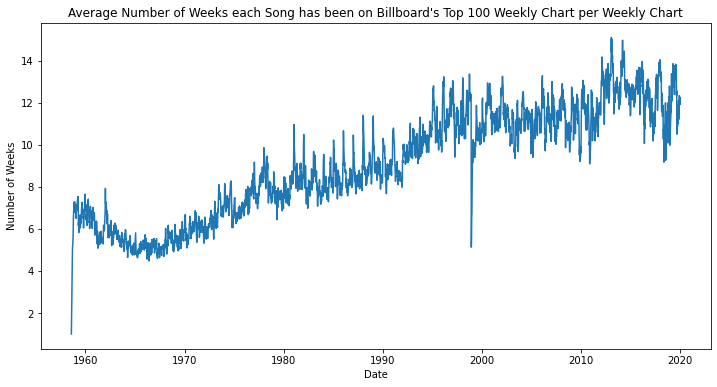

In [93]:
average = df1.groupby('WeekID').mean().sort_values('WeekID', ascending=True)
#median = df1.groupby('WeekID').median().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks each Song has been on Billboard's Top 100 Weekly Chart per Weekly Chart")
plt.plot(average['Weeks on Chart']);

So there are a couple things we notice on this graph. First, there's that initial jump. The first few charts had no significant values for "Weeks on Chart". That is, all songs on the first chart had been on the charts 1 week. The second week was a mix of 1 and 2 weeks, etc.

Second, I'm quite surprised by the very clear upward trend. It seems like songs are spending longer on the chart but. The volatility may just be explained by the increase in number of weeks.

Last, that dip just before 2000 is unusual. It's so short though, maybe a few weeks. I'm going to ignore it for the time being.

Let's also long at staying power of top 10 songs vs bottom 50 songs.

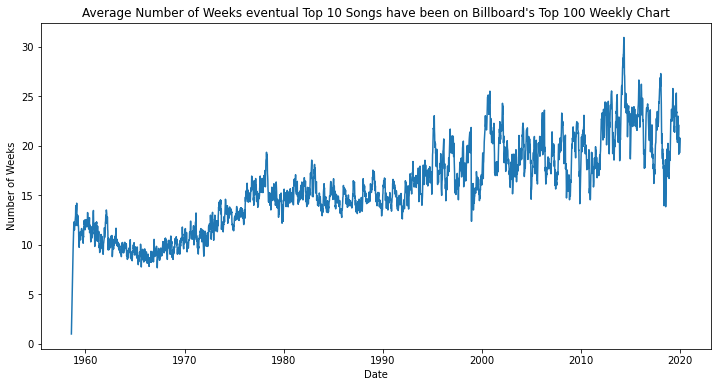

In [94]:
top_10_mean = df1[df1['Peak Position'] <=10].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks eventual Top 10 Songs have been on Billboard's Top 100 Weekly Chart")
plt.plot(top_10_mean['Weeks on Chart']);

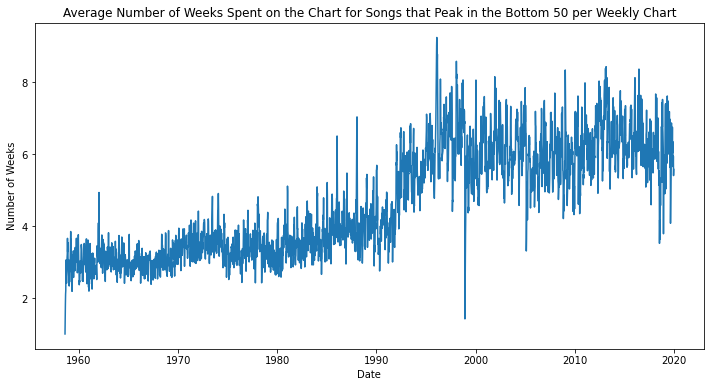

In [95]:
bottom_50_mean = df1[df1['Peak Position'] >=50].groupby('WeekID').mean().sort_values('WeekID', ascending=True)
plt.figure(figsize=(12,6))
plt.ylabel('Number of Weeks')
plt.xlabel('Date')
plt.title("Average Number of Weeks Spent on the Chart for Songs that Peak in the Bottom 50 per Weekly Chart")
plt.plot(bottom_50_mean['Weeks on Chart']);

I think this is an interesting graph. From 1960 through 1992 or so, we see the staying power of eventual bottom 50 songs is pretty constant. From 1992ish until 1995 or so their time spent on the chart starts to rise. Then in 1995 or so it levels out again. A small poke around the internet (that is, Wikipedia) revelease a little bit of industry shakeup. 

SONY bought out in 1988 and rebranded in 1991 another major label. 
Warner Music Group dealt with a ton of internal drama through the 90s that settled by 96 or so. This looks like a really interesting time period to do more research on. Somewhere in there we may find some reasons for why those bottom 50 songs went from 2-3 weeks on the charts to 4-6 weeks on the charts.

In [96]:
#new_df1 = df1.groupby('SongID').agg({'WeekID':'max', 'Peak Position':'min', 'Weeks on Chart':'max' })[['WeekID', 'Peak Position','Weeks on Chart']].reset_index()

In [97]:
#print(new_df1.isnull().sum())
#print(len(new_df1))
#new_df1.head()

# 2: Explore musicality

Let's load our dataframe that's converted things like acousticness and speachiness to a number as well as listen to a few examples and get a sense of those measurements.

In [98]:
df2 = pd.read_excel("https://query.data.world/s/i3nlbm2tqich6icwnp25de3gtph2xw")
df2.head()
len(df2)

28492

In [99]:
df2.isnull().sum()


SongID                           0
Performer                        0
Song                             0
spotify_genre                 1232
spotify_track_id              4749
spotify_track_preview_url    14328
spotify_track_album           4755
spotify_track_explicit        4749
spotify_track_duration_ms     4749
spotify_track_popularity      4749
danceability                  4812
energy                        4812
key                           4812
loudness                      4812
mode                          4812
speechiness                   4812
acousticness                  4812
instrumentalness              4812
liveness                      4812
valence                       4812
tempo                         4812
time_signature                4812
dtype: int64

Half the songs don't have a spotify url, nor is it that interesting of a feature, so I'll just drop that column, as well as some of the other spotify information.

There's a lot of missing information across danceability through time signature though. I'll drop missing values and hope that nearly all of thsoe missing values correlate with each other.

In [100]:

df2 = df2.drop(columns= ['Performer', 'Song', 'spotify_track_preview_url','spotify_track_id', 'spotify_track_album'])


In [101]:
df2.isnull().sum()

SongID                          0
spotify_genre                1232
spotify_track_explicit       4749
spotify_track_duration_ms    4749
spotify_track_popularity     4749
danceability                 4812
energy                       4812
key                          4812
loudness                     4812
mode                         4812
speechiness                  4812
acousticness                 4812
instrumentalness             4812
liveness                     4812
valence                      4812
tempo                        4812
time_signature               4812
dtype: int64

In [102]:
df2=df2.dropna()
len(df2)

23565

So, we're at 23565 entries, down from 28492. We've lost 4927 data points which doesn't seem bad. We were going to lose at least 4812 from missing entries in the features we were interested in and we're only out 115 more than that.

Let's explore some of these features we're interested in.

In [103]:
df2[:50]

SongID  ... time_signature
0                       AdictoTainy, Anuel AA & Ozuna  ...            4.0
2                   ShallowLady Gaga & Bradley Cooper  ...            4.0
3                 EnemiesPost Malone Featuring DaBaby  ...            4.0
4     Bacc At It AgainYella Beezy, Gucci Mane & Quavo  ...            4.0
5                              The ArcherTaylor Swift  ...            4.0
6                                         VIBEZDaBaby  ...            4.0
7                                    When I Grow UpNF  ...            4.0
8                     Hollywood's BleedingPost Malone  ...            4.0
10                              Famous HoesNLE Choppa  ...            4.0
11                        Cornelia StreetTaylor Swift  ...            4.0
12                    HeatChris Brown Featuring Gunna  ...            4.0
14                          Yellow HeartsAnt Saunders  ...            4.0
15                    Make It RightBTS Featuring Lauv  ...            4.0
16                                             TimeNF  ...            4.0
17                  Cuban LinksRod Wave & Kevin Gates  ...            4.0
18                PetaRoddy Ricch Featuring Meek Mill  ...            4.0
19                                        INTRODaBaby  ...            4.0
20  Don't Check On MeChris Brown Featuring Justin ...  ...            4.0
21                            Dance MonkeyTones And I  ...            4.0
22                                HeartlessThe Weeknd  ...            4.0
23  Break Up With Your Girlfriend, I'm BoredAriana...  ...            4.0
24  GOSPELDaBaby Featuring Chance The Rapper, Gucc...  ...            4.0
25  Miss Americana & The Heartbreak PrinceTaylor S...  ...            4.0
26                           Prayed For YouMatt Stell  ...            4.0
27                                 GoldenHarry Styles  ...            4.0
28           Bad Bad BadYoung Thug Featuring Lil Baby  ...            4.0
29           Bad Bad BadYoung Thug Featuring Lil Baby  ...            4.0
30                       Watermelon SugarHarry Styles  ...            4.0
32                          Better TogetherLuke Combs  ...            4.0
33  TakeawayThe Chainsmokers & Illenium Featuring ...  ...            4.0
34                               LivingDierks Bentley  ...            4.0
35  SomebodyInternet Money, Lil Tecca & A Boogie W...  ...            4.0
36                         TapNAV Featuring Meek Mill  ...            4.0
37                 Hate MeEllie Goulding & Juice WRLD  ...            4.0
38                                The ManTaylor Swift  ...            4.0
39                                  Valentino24kGoldn  ...            4.0
42                                    TrampolineSHAED  ...            4.0
43                         God's CountryBlake Shelton  ...            4.0
44                                   Without MeHalsey  ...            4.0
45                          Easier5 Seconds Of Summer  ...            4.0
46  Hot ShowerChance The Rapper Featuring MadeinTY...  ...            4.0
47                  Que PretendesJ Balvin & Bad Bunny  ...            4.0
48                                FallingHarry Styles  ...            4.0
49                    HIGHEST IN THE ROOMTravis Scott  ...            4.0
50                         Nice To Meet YaNiall Horan  ...            4.0
51                           Just How It IsYoung Thug  ...            4.0
52        All I Want For Christmas Is YouMariah Carey  ...            4.0
53              SenoritaShawn Mendes & Camila Cabello  ...            4.0
54                                InternetPost Malone  ...            4.0
55                              BabyLil Baby & DaBaby  ...            4.0

[50 rows x 17 columns]

Acousticness:	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Acoustic: (of popular music or musical instruments) not having electrical amplification.

So we should be looking at audio fairly devoid of any electrical effects or amplification.

In [104]:
df2.sort_values('acousticness', ascending=False)[:10]

SongID  ... time_signature
11827                           ExodusFerrante & Teicher  ...            4.0
19806                               StimulationWa Wa Nee  ...            4.0
22338                              StardustFrank Sinatra  ...            5.0
14141          It's Just A House Without YouBrook Benton  ...            4.0
10854                Stranger On The ShoreMr. Acker Bilk  ...            4.0
15603               Afternoon DelightStarland Vocal Band  ...            4.0
14000   Nothing But GoodHank Ballard And The Midnighters  ...            4.0
27071  Theme From "Close Encounters Of The Third Kind...  ...            4.0
19711                        Thank You BabyThe Shirelles  ...            4.0
2906          I Dreamed Of A Hill-Billy HeavenTex Ritter  ...            4.0

[10 rows x 17 columns]

Ferrante & Teicher, as 2 people playing pianos makes sense. I'm highly suspicious of Simulation by Wa Wa Nee, a very synthetic pop song. Sinatra makes sense, as does most of the rest of these top 15. While Justin Bieber has put out a number of dance songs with electronic influence, Nothing Like Us is actually one of his quieter, more instrumental songs.

So it looks like #2 might just be an outlier.

In [105]:
df2.sort_values('acousticness', ascending=True)[:15]

SongID  ... time_signature
19669                             SpeakGodsmack  ...            4.0
23236             Check My BrainAlice In Chains  ...            4.0
22239              An Honest MistakeThe Bravery  ...            4.0
22114  Devil's AngelsDavie Allan And The Arrows  ...            4.0
13909                          Here To StayKorn  ...            4.0
6431                       Easy LivinUriah Heep  ...            4.0
9547              Just Like YouThree Days Grace  ...            4.0
19665                        Celebrity SkinHole  ...            4.0
5894                                AliveP.O.D.  ...            4.0
21043                Reach For The SkyFirehouse  ...            4.0
19367                      Step OnHappy Mondays  ...            4.0
27608              Times Like TheseFoo Fighters  ...            4.0
24135  Under And Over ItFive Finger Death Punch  ...            4.0
22256                                 BlowKe$ha  ...            4.0
17928           Papa Don't PreachKelly Osbourne  ...            4.0

[15 rows x 17 columns]

And this seems to be a pretty good sign. We see a lot of rock and metal, so we're talking electric guitars with distortion, and then a few pop songs at the end.

In [106]:
df2.sort_values('speechiness', ascending=False)[:5]

SongID  ... time_signature
23140      Ajax AirlinesHudson and Landry  ...            4.0
5859   Ajax Liquor StoreHudson and Landry  ...            4.0
23816            Trouble Me10,000 Maniacs  ...            4.0
16560      Grandmother's SongSteve Martin  ...            4.0
21799        Blah, Blah, BlahNicola Paone  ...            5.0

[5 rows x 17 columns]

The first song is a country song which is a little weird but the next few entries make more sense. Hudson and Landry are a comedy duo, Steve Martin is more comedy, those should be here. We'll also note those comedy bits are high on acousticness as well.

In [107]:
corr_df = df2.corr()
corr_df

spotify_track_explicit  ...  time_signature
spotify_track_explicit                   1.000000  ...        0.073553
spotify_track_duration_ms                0.058768  ...        0.073590
spotify_track_popularity                 0.328945  ...        0.112708
danceability                             0.279938  ...        0.223568
energy                                   0.075341  ...        0.230022
key                                      0.018049  ...        0.008031
loudness                                 0.227744  ...        0.122206
mode                                    -0.140769  ...       -0.058257
speechiness                              0.531674  ...        0.086535
acousticness                            -0.190454  ...       -0.217331
instrumentalness                        -0.068879  ...        0.008412
liveness                                 0.013983  ...       -0.012824
valence                                 -0.150851  ...        0.144858
tempo                                    0.004233  ...       -0.017713
time_signature                           0.073553  ...        1.000000

[15 rows x 15 columns]

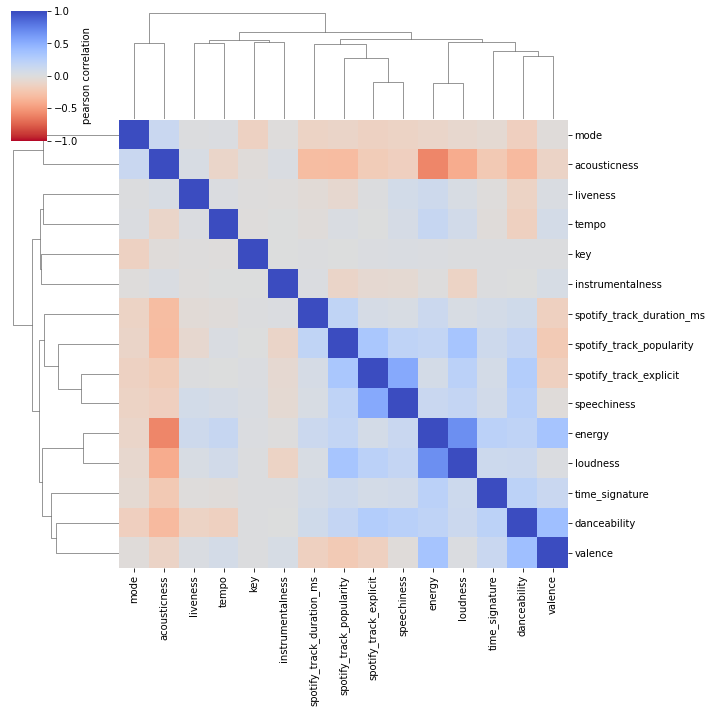

In [108]:
sns.clustermap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm_r',
    cbar_kws={'label': 'pearson correlation'}
);

This heatmap is pretty interesting. We notice the following correlations among features:

4 and 6: strong positive, 0 and 8: slight positive, 4 and 9: strong negative

So let's see what those features are:

0 - explicit

8 - speechiness

9 - acousticness

4 - energy

6 - loudness

It might not be totally surprising that loudness and energy have strong positive correlation while energy and acousticness (as well as acousticness and loudness) have negative correlations. As per explicit and speechiness, I have a hunch and I might look at genres to see what's there.

Let's see how various features compare with each other.


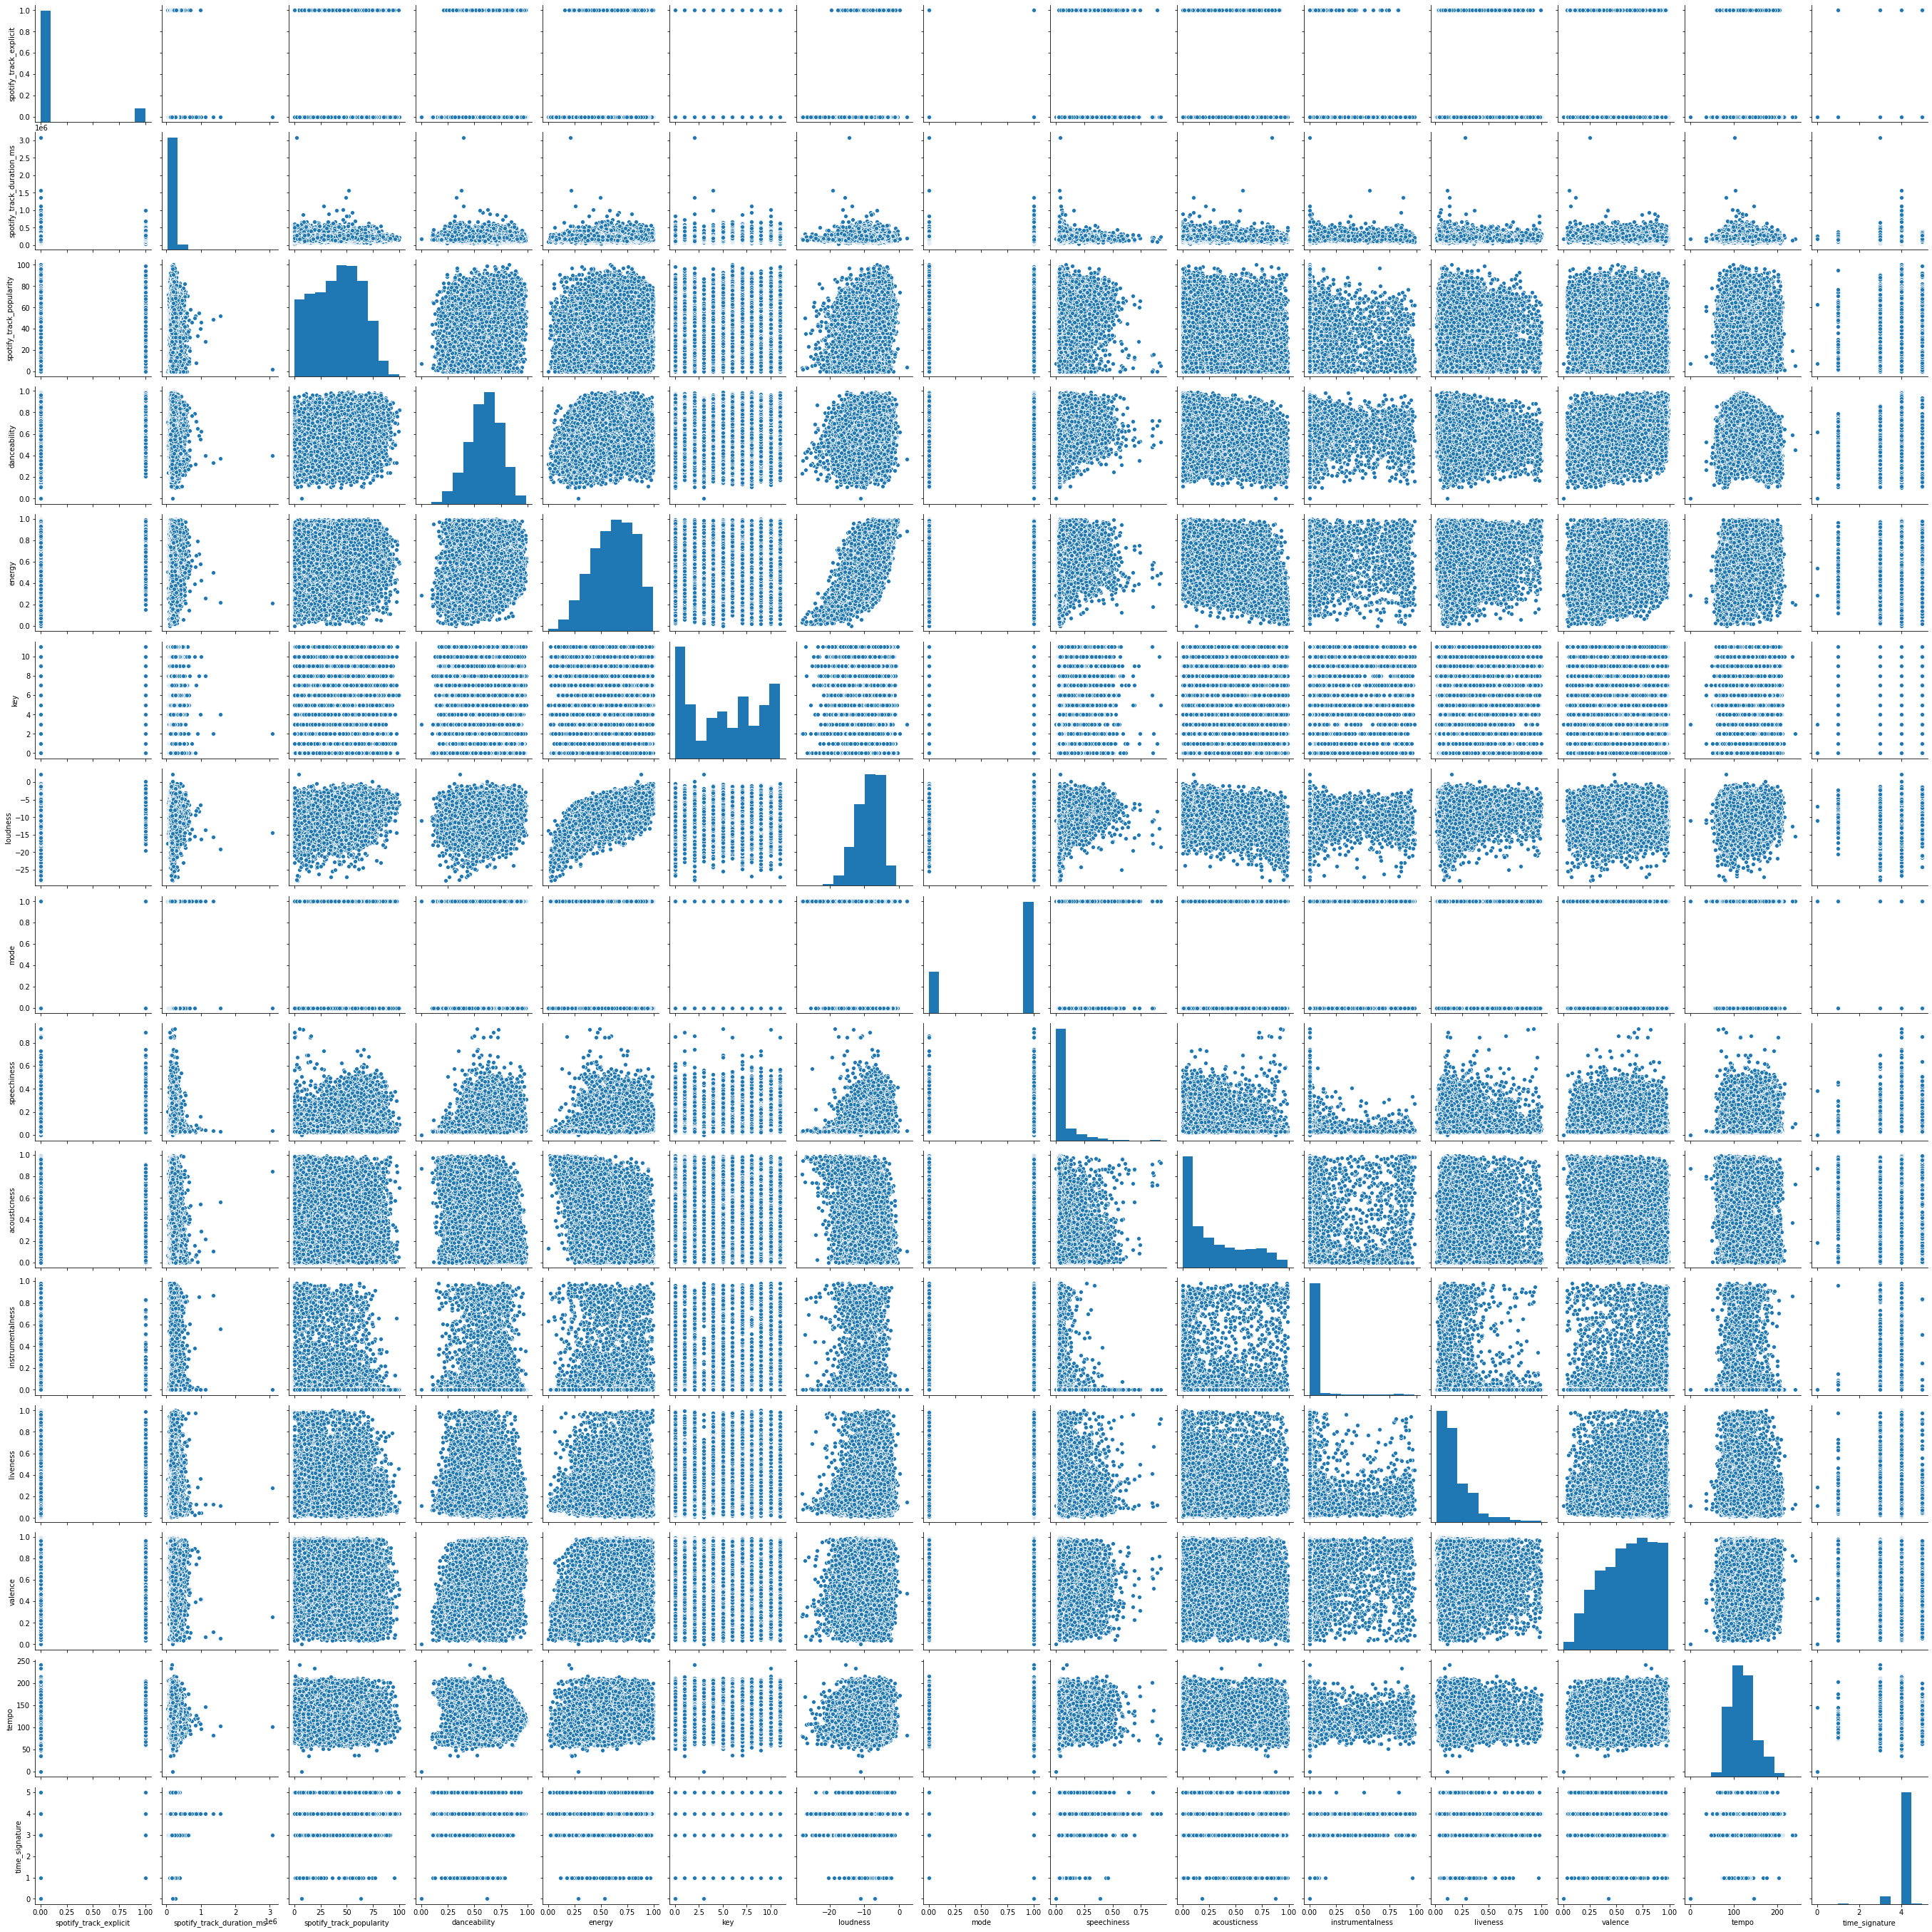

In [109]:
sns.pairplot(df2)

Again, it's very easy to understand the relationship between loudness and energy. 

Some of the empty spaces in the scatter plots define some interesting relationships too. At all levels of instrumentalness we see a pretty even spread for low level of liveness, but we really only see high levels of liveness for low levels of instrumentalness. 

Now let's merge this onto our first dataframe and add these measures of musicality for our chart info.

In [110]:
merged_left = df1.merge(right=df2)
merged_left['spotify_track_duration_ms']=merged_left['spotify_track_duration_ms']/1000
merged_left = merged_left.rename(columns={'spotify_track_duration_ms':'spotify_track_duration_seconds'})


In [111]:
merged_left.head()

url  ... time_signature
0  https://www.billboard.com/charts/hot-100/2019-...  ...            4.0
1  https://www.billboard.com/charts/hot-100/2019-...  ...            4.0
2  https://www.billboard.com/charts/hot-100/2019-...  ...            4.0
3  https://www.billboard.com/charts/hot-100/2019-...  ...            4.0
4  https://www.billboard.com/charts/hot-100/2019-...  ...            4.0

[5 rows x 26 columns]

Now that we've merged both dataframes, let's look at what happens to some of these sound measurements over time!

In [112]:
mean = merged_left.groupby('WeekID').mean().sort_values('WeekID', ascending=True)

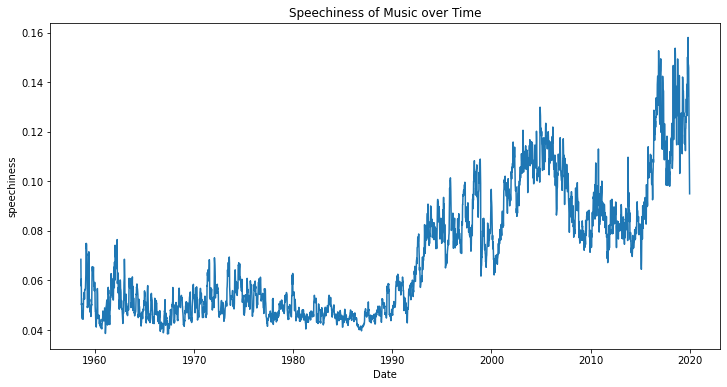

In [113]:
plt.figure(figsize=(12,6))
plt.ylabel('speechiness')
plt.xlabel('Date')
plt.title("Speechiness of Music over Time")
plt.plot(mean['speechiness']);

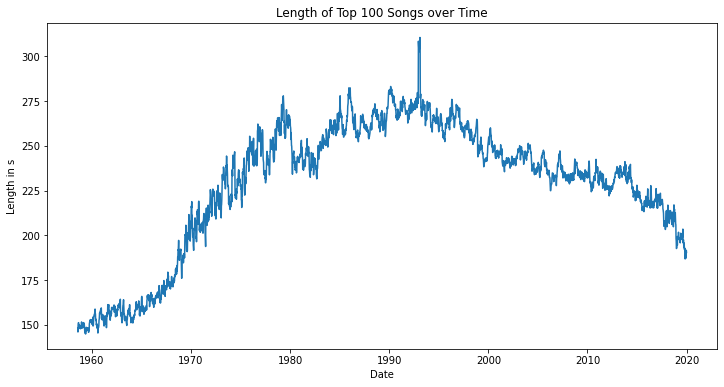

In [114]:
plt.figure(figsize=(12,6))
plt.ylabel('Length in s')
plt.xlabel('Date')
plt.title("Length of Top 100 Songs over Time")
plt.plot(mean['spotify_track_duration_seconds']);

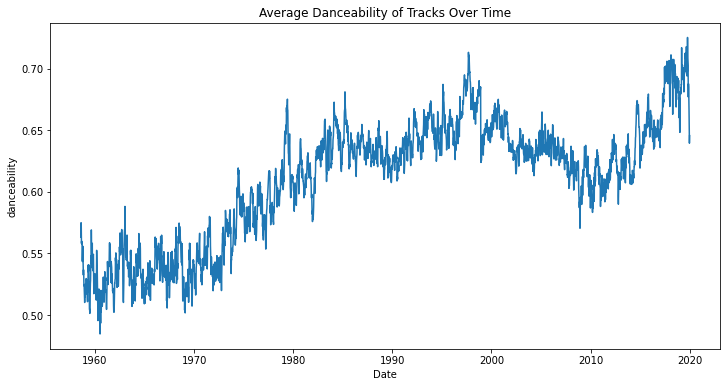

In [115]:
plt.figure(figsize=(12,6))
plt.ylabel('danceability')
plt.xlabel('Date')
plt.title("Average Danceability of Tracks Over Time")
plt.plot(mean['danceability']);

# 3: Predict Year Based on Musicality!

## a: Multiple Linear Regression

In [116]:
grouped_df1 = df1.groupby('SongID').agg({'WeekID':'max', 'Peak Position':'min', 'Weeks on Chart':'max' })[['WeekID', 'Peak Position','Weeks on Chart']].reset_index()
merged = df2.merge(grouped_df1)
merged['year'] = pd.DatetimeIndex(merged['WeekID']).year
len(merged)

23564

In [117]:
merged = merged.drop(columns=['spotify_genre', 'Weeks on Chart','WeekID', 'spotify_track_popularity', 'key', 'time_signature', 'mode'])
merged = merged.set_index(keys=['SongID'])


In [118]:
merged_top_30 = merged[merged['Peak Position'] <= 30].drop(columns=['Peak Position'])

X = merged_top_30.drop('year',axis=1).values
y = merged_top_30['year'].values
features =  merged_top_30.drop('year', axis =1).columns

In [119]:
from sklearn.model_selection import train_test_split


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

In [123]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
reg = LinearRegression().fit(X_train, y_train)
print('The coefficient of determination on the train data is', reg.score(X_train, y_train))
print('The coefficient of determination on the test data is', reg.score(X_test, y_test))


The coefficient of determination on the train data is 0.5834972719813545
The coefficient of determination on the test data is 0.5695024329422921


### regression model is reg  ----- This is so when I'm calling models at the bottom, I can refer to the table of contents at the right to see the name of each model



In [126]:
reg_feature_importance = list(zip(features, reg.coef_))

In [127]:
feat_import = pd.DataFrame(reg_feature_importance, columns = ['Feature', 'Reg Coeff'])

In [128]:
feat_import

Feature  Reg Coeff
0      spotify_track_explicit   9.879304
1   spotify_track_duration_ms  63.885262
2                danceability  29.181155
3                      energy  -2.348821
4                    loudness  41.983919
5                 speechiness  14.751713
6                acousticness -16.122145
7            instrumentalness  -7.920954
8                    liveness  -2.520444
9                     valence -26.381072
10                      tempo   5.287121

It's interesting, but not surprising, that both spotify_track_duration and danceability have such large coefficients. We saw very strong patterns over time among these features when exploring the data set. 

## b: Gradient Boosted Regressor

In [129]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(random_state=0)
boost_reg.fit(X_train, y_train)
boost_predictions = boost_reg.predict(X_test)
boost_reg.score(X_test, y_test)
#reg.feature_importances_

0.7053564505685994

In [130]:
boost_reg.feature_importances_

array([0.14526749, 0.39872808, 0.03842772, 0.00696702, 0.23108598,
       0.01264159, 0.0691913 , 0.03080025, 0.0035097 , 0.05501216,
       0.00836872])

### boosted regression is boost_reg

## c: Decision Tree Regressor

In [131]:
from sklearn import tree

In [132]:
tree_model = tree.DecisionTreeRegressor(criterion ="mse")

In [133]:
tree_model = tree_model.fit(X_train, y_train)

In [134]:
tree_pred = tree_model.predict(X_test)
tree_score = tree_model.score(X_test, y_test)
print(tree_score)

0.45947326399577076


In [135]:
feat_import['Tree Weights'] = tree_model.feature_importances_
feat_import

Feature  Reg Coeff  Tree Weights
0      spotify_track_explicit   9.879304      0.116350
1   spotify_track_duration_ms  63.885262      0.355189
2                danceability  29.181155      0.046226
3                      energy  -2.348821      0.032263
4                    loudness  41.983919      0.202168
5                 speechiness  14.751713      0.042217
6                acousticness -16.122145      0.058458
7            instrumentalness  -7.920954      0.038119
8                    liveness  -2.520444      0.027003
9                     valence -26.381072      0.053432
10                      tempo   5.287121      0.028575

### decision tree is tree_model

## d: Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
random_forest = RandomForestRegressor(n_estimators=500)
random_forest = random_forest.fit(X_train, y_train)

In [138]:
random_forest.score(X_test,y_test)

0.7271182371640695

In [139]:
random_forest_predictions = random_forest.predict(X_test)

### random forest model is random_forest

## e: Sequential Neural Network

In [140]:
import tensorflow as tf
import keras

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [145]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=1500)

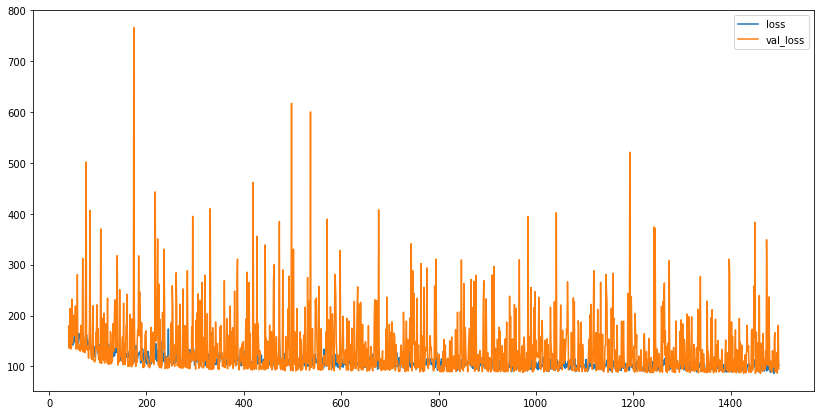

In [147]:
losses = pd.DataFrame(model.history.history)[40:]
losses.plot(figsize=(14,7));

In [148]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [156]:
nn_pred= model.predict(X_test)
print(mean_squared_error(y_test,nn_pred))
nn_pred = nn_pred.flatten()

95.23675838992509


#4 Model Comparisons

In [150]:
comparison = pd.DataFrame()

In [167]:
comparison['Reg Predictions']=reg_pred
comparison['Boosted Regression Predictions']= boost_predictions
comparison['Tree Predictions']=tree_pred
comparison['RF Predictions']=random_forest_predictions
comparison['NN Predictions']=nn_pred
comparison['Actual']=y_test


In [168]:
comparison.head()

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
0      1966.963436                     2009.637680  ...     2013.585327    2014
1      1988.477646                     1995.166463  ...     1995.773804    1990
2      2000.165657                     2001.415128  ...     2000.305054    2004
3      2012.638397                     1980.401367  ...     1980.754028    1983
4      1998.053577                     1980.413031  ...     1983.779907    1978

[5 rows x 6 columns]

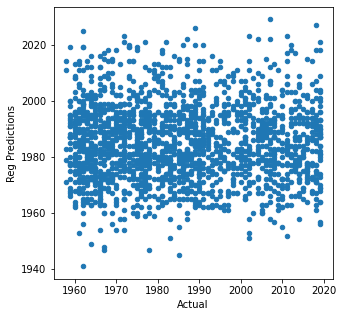

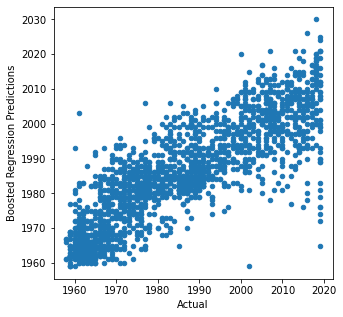

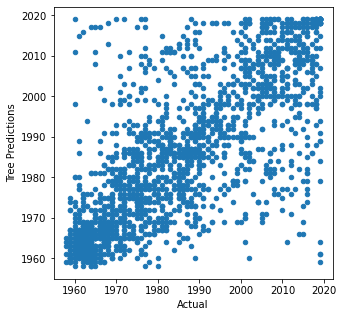

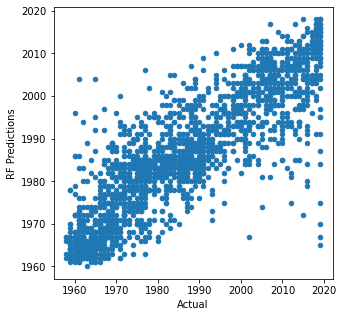

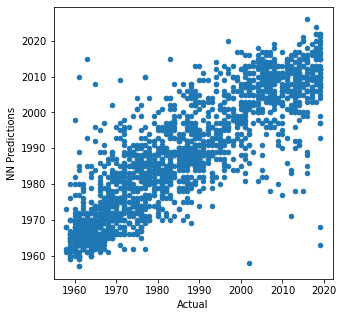

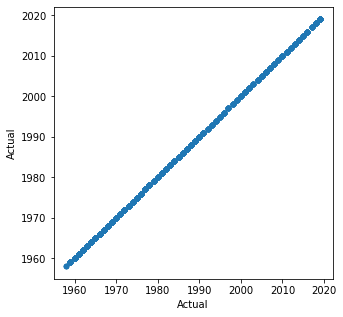

In [155]:
for i in comparison.columns:
  comparison.plot.scatter(x='Actual', y=i, figsize=(5,5))

 So, each of these should look as close as possible to the last graph, which is just y=x. We see multiple linear regression was all over the place and, perhaps not surprisingly, an ineffective tool. The decision tree regression is interesting in that it did a pretty good job but had some really funky outliers. I don't know that I'd learn a lot, but exploring those outliers could lead to an interesting analysis of musicality and what artists/songs were really different from their contemproraries.

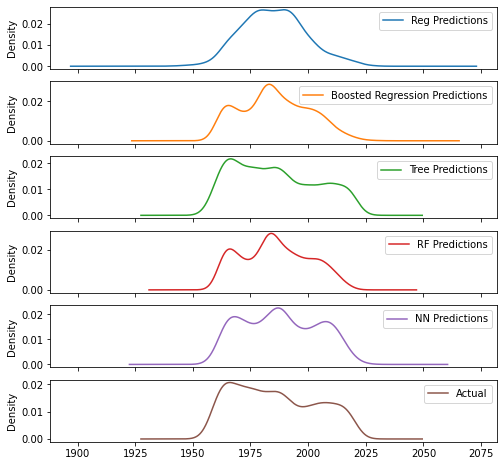

In [154]:
comparison.plot(subplots=True, figsize=(8, 8), kind='kde'); plt.legend(loc='best');

I like these KDE plots. I think they clearly communicate which models did a better job predicting songs from specific eras. From these charts, it looks like the trees do among the best job, but 

In [ ]:
comparison.describe()

Reg Predictions  ...       Actual
count      1843.000000  ...  1843.000000
mean       1985.746805  ...  1985.761259
std          13.807794  ...    17.940772
min        1941.061337  ...  1958.000000
25%        1975.975059  ...  1970.000000
50%        1985.320628  ...  1984.000000
75%        1994.662866  ...  2001.000000
max        2029.110633  ...  2019.000000

[8 rows x 6 columns]

Describe isn't that helpful here. We don't care about the average of all the songs' ages. Rather, we want to understand what the errors look like.

In [ ]:
errors = pd.DataFrame()

for i in comparison.columns:
  errors[i] = comparison[i]-comparison['Actual']

In [ ]:
errors.describe()

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
count      1843.000000                     1843.000000  ...     1843.000000  1843.0
mean         -0.518177                       -0.163863  ...        2.142160     0.0
std          22.696101                        9.737391  ...        9.392132     0.0
min         -63.000000                      -54.000000  ...      -56.000000     0.0
25%         -17.000000                       -5.000000  ...       -3.000000     0.0
50%           0.000000                        0.000000  ...        2.000000     0.0
75%          16.000000                        6.000000  ...        7.000000     0.0
max          63.000000                       42.000000  ...       52.000000     0.0

[8 rows x 6 columns]

Again, the regression was just a mess so we're going to ignore that.

I think it's really interesting that the Tree has the mean closest to 0 but a larger standard deviation. That agrees with the scatter plots and kde plots above. The tree's kde shape was the most similar, but we saw some very poorly classified songs in the scatter plot.

Also each of these models found at least one song in the test set that it thought was between 42 and 63 years in the future and a song between 54 and 63 years in the past. I suspect we can tell what song that is from the scatter plots. From the scatter plot we see each of the models has a song in the 1958-1960 range that it predicted as having originated 40+ years in the future. From the scatter plot we see each also has a song originating in 2002 or so that it thinks came from the past. Let's see if we can find these two songs.

In [170]:
errors[errors['Boosted Regression Predictions']== 42]

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
23             29.0                            42.0  ...            49.0     0.0

[1 rows x 6 columns]

We don't know if it's EVERY song with a RF prediction error of 43, but there is one song having the largest error for both the boosted regression and random forest at index 23.

In [174]:
errors[errors['RF Predictions']== 43]

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
23             29.0                            42.0  ...            49.0     0.0

[1 rows x 6 columns]

Ok, it is the same song

In [172]:
errors[errors['Tree Predictions'] == 59]

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
1726             35.0                            12.0  ...             3.0     0.0

[1 rows x 6 columns]

Our max tree error is not the same as our max neural net error, and our NN actually did a really good job predicting the age of that song!

In [175]:
errors[errors['NN Predictions'] == 52]

Reg Predictions  Boosted Regression Predictions  ...  NN Predictions  Actual
1280             16.0                            12.0  ...            52.0     0.0

[1 rows x 6 columns]

So, the song "most from the future" predicted by each model occured at index 23 (boosted regression and RF, interesting it's both ensemble classifiers), 1726 (tree), and 1280 (neural net). Let's see what those songs are by first looking up the length of our training data then adding the test data index

In [206]:
RF_worst = pd.DataFrame(scaler.inverse_transform([X_test[23]]).flatten())
RF_worst.transpose()

0         1      2      3      4   ...     6    7      8      9        10
0  0.0  209586.0  0.602  0.407 -6.457  ...  0.316  0.0  0.231  0.249  105.211

[1 rows x 11 columns]

In [205]:
merged_top_30[merged_top_30['spotify_track_duration_ms'] == 209586]

spotify_track_explicit  ...  year
SongID                                                                      ...      
Please Love Me ForeverCathy Jean and The Roommates                     0.0  ...  1961
Invisible TouchGenesis                                                 0.0  ...  1986

[2 rows x 12 columns]

Two songs have the same length, but we see the first song, Please Love Me Forever by Cathy Jean and The Roommates also matches the rest of the columns.


In [207]:
Tree_worst = pd.DataFrame(scaler.inverse_transform([X_test[1726]]).flatten())
Tree_worst.transpose()

0         1     2      3       4   ...     6         7       8      9        10
0  0.0  119746.0  0.29  0.125 -17.262  ...  0.915  0.000243  0.0937  0.277  165.897

[1 rows x 11 columns]

In [208]:
merged_top_30[merged_top_30['spotify_track_duration_ms'] == 119746]

spotify_track_explicit  ...  year
SongID                                       ...      
Hound Dog ManFabian                     0.0  ...  1960

[1 rows x 12 columns]

Hound Dog Man by Fabian? I've certainly never heard of it, but I'll check it out.

In [209]:
NN_worst = pd.DataFrame(scaler.inverse_transform([X_test[1280]]).flatten())
NN_worst.transpose()

0         1      2      3      4   ...     6        7      8      9        10
0  0.0  172693.0  0.563  0.289 -6.522  ...  0.961  0.00163  0.114  0.294  118.461

[1 rows x 11 columns]

In [210]:
merged_top_30[merged_top_30['spotify_track_duration_ms'] == 172693]

spotify_track_explicit  ...  year
SongID                                     ...      
No OneRay Charles                     0.0  ...  1963

[1 rows x 12 columns]

So our worst classified songs by model are  Please Love Me Forever by Cathy Jean and The Roommates (ensemble classifiers), Hound Dog Man by Fabian (tree), and No One by Ray Charles (neural network)

#5 Testing the models on songs outside top 30

Now let's predict the age of some songs that didn't go into the model by calling the spotify API in this notebook and extracting the features.

In [220]:
!pip install spotipy

In [221]:
import spotipy
import os
import sys
import json
import time
from spotipy.oauth2 import SpotifyClientCredentials

os.environ['SPOTIPY_CLIENT_ID'] =#### Your spotify client ID, not mine!
os.environ['SPOTIPY_CLIENT_SECRET']=### Your spotify client secret

I've always felt Leon Bridges has a very classic sound. Let's see if the models agree!

In [222]:
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace = False


results = sp.search(q='leon bridges river', limit=1)
tids = []
for i, t in enumerate(results['tracks']['items']):
    print(' ', i, t['name'])
    tids.append(t['uri'])

start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
for feature in features:
    print(json.dumps(feature, indent=4))
    #print()
    analysis = sp._get(feature['analysis_url'])
    #print(json.dumps(analysis, indent=4))
    #print()
print("features retrieved in %.2f seconds" % (delta,))

  0 River
{
    "danceability": 0.658,
    "energy": 0.179,
    "key": 8,
    "loudness": -10.866,
    "mode": 1,
    "speechiness": 0.0448,
    "acousticness": 0.689,
    "instrumentalness": 0,
    "liveness": 0.17,
    "valence": 0.191,
    "tempo": 128.128,
    "type": "audio_features",
    "id": "0NeJjNlprGfZpeX2LQuN6c",
    "uri": "spotify:track:0NeJjNlprGfZpeX2LQuN6c",
    "track_href": "https://api.spotify.com/v1/tracks/0NeJjNlprGfZpeX2LQuN6c",
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/0NeJjNlprGfZpeX2LQuN6c",
    "duration_ms": 238560,
    "time_signature": 4
}
features retrieved in 0.01 seconds


In [223]:
new_df = pd.DataFrame(features)

In [224]:
new_df = new_df.drop(columns=['key', 'type', 'id', 'uri', 'analysis_url', 'time_signature', 'mode', 'track_href']) #let's drop the features that we won't use

In [225]:
new_df['spotify_track_explicit'] =0 #It didn't extract this column so I'm editing it by hand
new_df = new_df.rename(columns={'duration_ms':'spotify_track_duration_ms'})

In [226]:
new_df

danceability  energy  ...  spotify_track_duration_ms  spotify_track_explicit
0         0.658   0.179  ...                     238560                       0

[1 rows x 11 columns]

One thing we notice is that the column order is different and that would throw off our models. Let's reorder the columns then apply the scaler and predict some years.

In [228]:
columns = merged_top_30.drop(columns=['year']).columns

In [230]:
new_df = new_df.reindex(columns, axis=1)
new_df

spotify_track_explicit  spotify_track_duration_ms  ...  valence    tempo
0                       0                     238560  ...    0.191  128.128

[1 rows x 11 columns]

In [231]:
new_df_scaled = scaler.transform(new_df.values)

In [237]:
print('boosted regreesion:', boost_reg.predict(new_df_scaled), 'tree prediction:', tree_model.predict(new_df_scaled), 'forest prediction:', random_forest.predict(new_df_scaled), 'nn prediction:', model.predict(new_df_scaled))


boosted regreesion: [1991.97237444] tree prediction: [1982.] forest prediction: [1998.352] nn prediction: [[2010.7319]]


The song was actually released in 2015 so while all predictions are older than that, I don't think they're quite the confirmation I was looking for. Though admittedly, when I listen to a song and imagine it's age, I'm not considering it's duration among other factors.

# 6 Conclusions and future work

So these models are definitely fun to play around with. I could probably spend all day looking up songs. It'd would be interesting to look at more of the outliers for each model. Also I didn't test the model at all on the bottom 70 songs and while many of those are eventual top 30 songs, there's a lot of music there to look at an understand through the lens of songs that do become popular.